In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/Discriptors_class_class01_pIC50.csv')

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class,pIC50,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.124939,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,7.000000,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,inactive,4.301030,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.522879,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.096910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.590067,1
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.621602,1
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.387216,1
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.200659,1


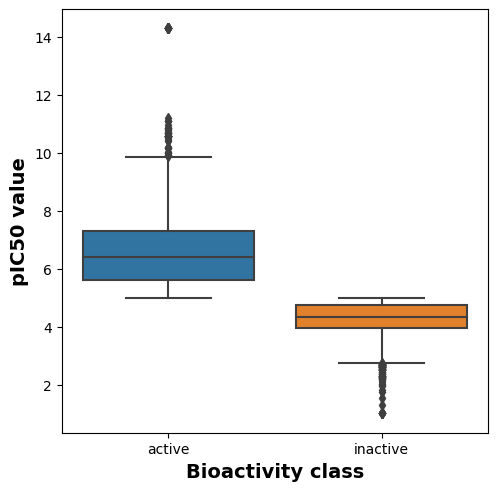

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig("boxplot_classes_pIC50.png")

In [ ]:
df = df[(df.pIC50 > 3) & (df.pIC50 < 9.8)]

In [ ]:
df = df.reset_index(drop = True)

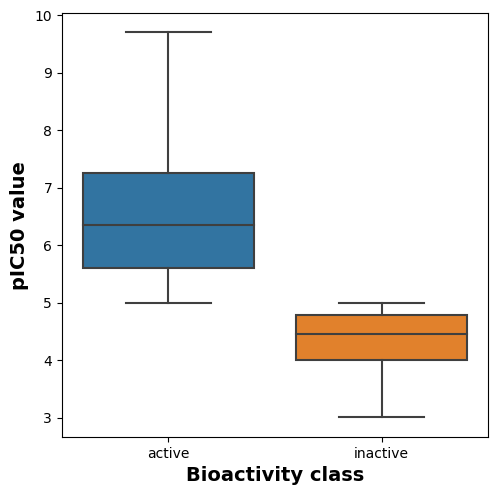

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig("boxplot_classes_pIC50_Noutlayers.png")

In [ ]:
X = df.drop(['bioactivity_class', 'bioactivity_class01', 'pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5602,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5603,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5604,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = df.drop(['bioactivity_class', 'pIC50'], axis=1)
train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5602,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5603,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5604,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Frequency')

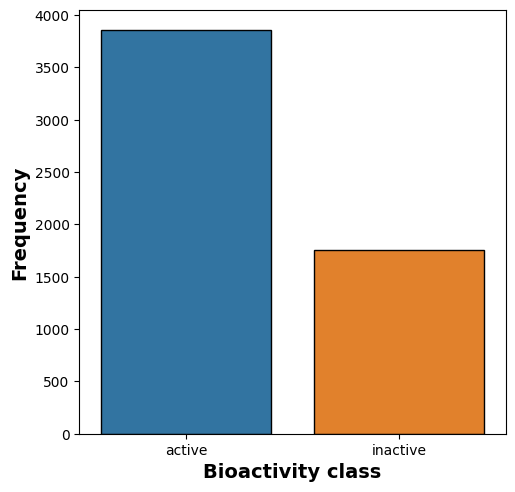

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

In [ ]:
df['bioactivity_class01'] = df.bioactivity_class01.astype('category')
df['bioactivity_class'] = df.bioactivity_class.astype('category')

In [ ]:
df['bioactivity_class'].value_counts()

active      3853
inactive    1753
Name: bioactivity_class, dtype: int64

<Axes: ylabel='bioactivity_class'>

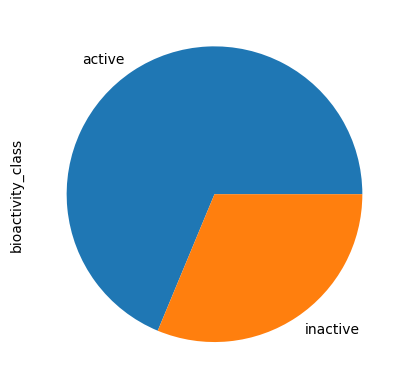

In [ ]:
df['bioactivity_class'].value_counts().plot.pie()

In [ ]:
Y = df.bioactivity_class01
Y

0       1
1       1
2       0
3       1
4       1
       ..
5601    1
5602    1
5603    1
5604    1
5605    1
Name: bioactivity_class01, Length: 5606, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
Y = pd.core.series.Series(Y)

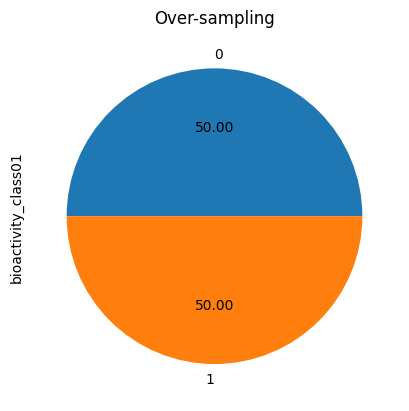

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
X = X_res
Y = y_res

In [ ]:
X.shape

(7706, 881)

In [ ]:
Y.shape

(7706,)

In [ ]:
import numpy as np

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
Y.shape

(7706,)

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
#X = selection.fit_transform(X)

In [ ]:
X.shape

(7706, 881)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_train.shape, Y_train.shape

((6164, 881), (6164,))

In [ ]:
X_test.shape, Y_test.shape

((1542, 881), (1542,))

#deep learning:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
hidden_units=200
learning_rate=0.001
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=250

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(hidden_units, input_dim=881, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [ ]:
sgd=optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,






    name='Adam',

)
#sgd=optimizers.SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [ ]:
model.fit(X_train, Y_train, epochs=no_epochs, batch_size=len(train),  verbose=2)

Epoch 1/250
2/2 - 1s - loss: 0.7455 - acc: 0.5016 - 971ms/epoch - 486ms/step
Epoch 2/250
2/2 - 0s - loss: 0.6955 - acc: 0.5553 - 304ms/epoch - 152ms/step
Epoch 3/250
2/2 - 0s - loss: 0.6728 - acc: 0.5599 - 261ms/epoch - 131ms/step
Epoch 4/250
2/2 - 0s - loss: 0.7037 - acc: 0.5318 - 258ms/epoch - 129ms/step
Epoch 5/250
2/2 - 0s - loss: 0.6486 - acc: 0.6395 - 234ms/epoch - 117ms/step
Epoch 6/250
2/2 - 0s - loss: 0.6530 - acc: 0.6064 - 238ms/epoch - 119ms/step
Epoch 7/250
2/2 - 0s - loss: 0.6226 - acc: 0.6583 - 221ms/epoch - 110ms/step
Epoch 8/250
2/2 - 0s - loss: 0.6246 - acc: 0.6504 - 249ms/epoch - 125ms/step
Epoch 9/250
2/2 - 0s - loss: 0.6010 - acc: 0.6746 - 248ms/epoch - 124ms/step
Epoch 10/250
2/2 - 0s - loss: 0.6079 - acc: 0.6554 - 217ms/epoch - 108ms/step
Epoch 11/250
2/2 - 0s - loss: 0.5845 - acc: 0.6942 - 237ms/epoch - 118ms/step
Epoch 12/250
2/2 - 0s - loss: 0.5894 - acc: 0.7010 - 237ms/epoch - 119ms/step
Epoch 13/250
2/2 - 0s - loss: 0.5720 - acc: 0.6994 - 215ms/epoch - 107ms/

In [ ]:
predictions = model.predict(X_test)

49/49 [==============================] - 0s 3ms/step


In [ ]:
predictions

array([[7.2561957e-02],
       [9.9838901e-01],
       [9.9980962e-01],
       ...,
       [9.9999940e-01],
       [9.9999994e-01],
       [6.6950470e-06]], dtype=float32)

In [ ]:
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 

In [ ]:
rounded = np.array(rounded)
rounded.shape

(1542,)

In [ ]:
Ytest = np.array(Y_test)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



# Calculer la matrice de confusion
confusion = confusion_matrix(Ytest, rounded)
print("Matrice de confusion :")
print(confusion)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(Ytest, rounded)
print("Accuracy score : {:.2f}".format(accuracy))

# Calculer la précision (precision) du modèle
precision = precision_score(Ytest, rounded)
print("Précision : {:.2f}".format(precision))

# Calculer le rappel (recall) du modèle
recall = recall_score(Ytest, rounded)
print("Recall score : {:.2f}".format(recall))

# Calculer la F-mesure (F1-score) du modèle
f1 = f1_score(Ytest, rounded)
print("F-mesure : {:.2f}".format(f1))


Matrice de confusion :
[[617 142]
 [104 679]]
Accuracy score : 0.84
Précision : 0.83
Recall score : 0.87
F-mesure : 0.85


Matrice de confusion : \\
[[338  81] \\
 [169 577]] \\
Accuracy score : 0.79 \\
Précision : 0.88 \\
Recall score : 0.77 \\
F-mesure : 0.82 \\

Matrice de confusion : \\
[[162  92] \\
 [ 71 400]] \\
Exactitude : 0.78 \\
Précision : 0.81 \\
Rappel : 0.85 \\
F-mesure : 0.83 \\

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class,pIC50,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.124939,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,7.000000,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,inactive,4.301030,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.522879,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.096910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.590067,1
5602,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.621602,1
5603,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.387216,1
5604,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.200659,1


In [ ]:
df.groupby(['bioactivity_class']).mean()["pIC50"]

<ipython-input-35-39bf5d24fd2a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['bioactivity_class']).mean()["pIC50"]


bioactivity_class
active      6.528644
inactive    4.357174
Name: pIC50, dtype: float64

Text(0, 0.5, 'pIC50 value')

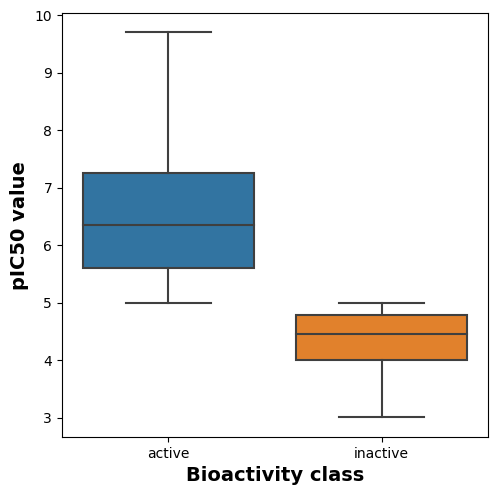

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


In [ ]:
df[df['bioactivity_class'] == 'active'].describe()["pIC50"]

count    3853.000000
mean        6.528644
std         1.091865
min         5.000869
25%         5.596879
50%         6.356547
75%         7.258848
max         9.698970
Name: pIC50, dtype: float64

In [ ]:
df[df['bioactivity_class'] == 'inactive'].describe()["pIC50"]

count    1753.000000
mean        4.357174
std         0.512047
min         3.001871
25%         4.000000
50%         4.453457
75%         4.787280
max         5.000000
Name: pIC50, dtype: float64

#machine learning:

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
(X_train.shape[0], X_train.shape[1])

(6164, 881)

In [ ]:
model = Sequential()
model.add(LSTM(5, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



# fit network
history = model.fit(X_train, Y_train, epochs=20, batch_size=140, validation_data=(X_test, Y_test), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(X_test)



# calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
#yhat

In [ ]:
#roundedp = [int(round(x[0])) for x in yhat]
#print(roundedp)

In [ ]:
#confusion = confusion_matrix(Y_test, roundedp)
#print("Matrice de confusion :")
#print(confusion)

In [ ]:
#model = Sequential()
#model.add(LSTM(units=1, input_shape=(X_train.shape[1], 1)))
#model.add(Dense(units=1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train,Y_train, epochs=10, batch_size=150)

# Evaluate the model on the test set
#loss, accuracy = model.evaluate(X_test, Y_test)
#print("Test loss:", loss)
#print("Test accuracy:", accuracy)

In [ ]:
#hat = model.predict(X_test)

In [ ]:
#roundedp = [int(round(x[0])) for x in hat]
#print(roundedp)